<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5645 non-null   object 
 1   title     5645 non-null   object 
 2   year      5645 non-null   float64
 3   runtime   5645 non-null   float64
 4   genres    5645 non-null   object 
 5   rating    5645 non-null   float64
 6   numVotes  5645 non-null   int64  
 7   budget    1663 non-null   float64
 8   gross     2062 non-null   float64
 9   votes     2076 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 441.1+ KB


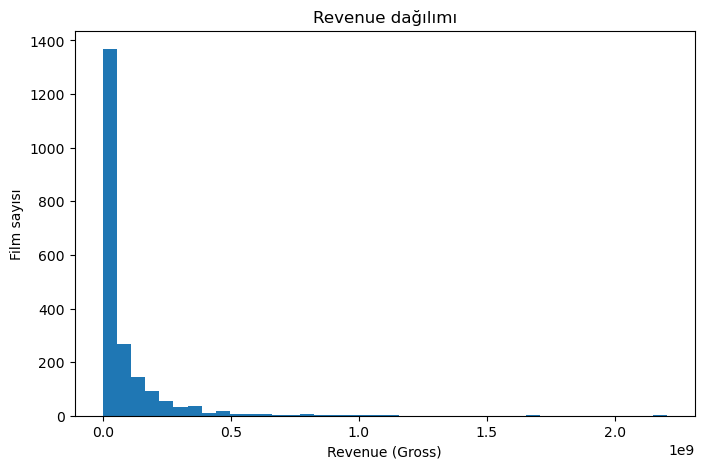

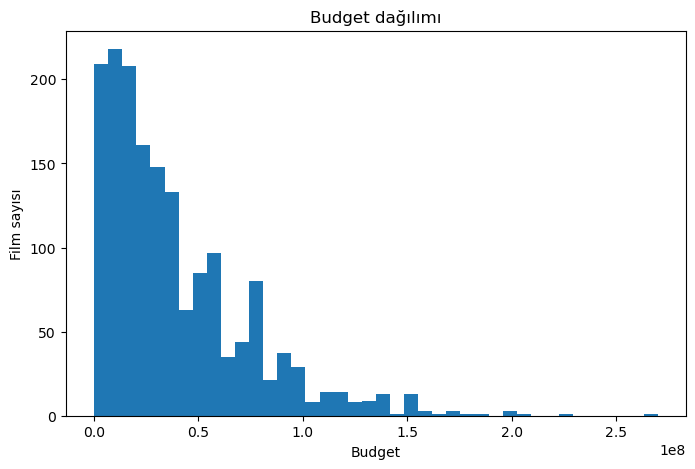

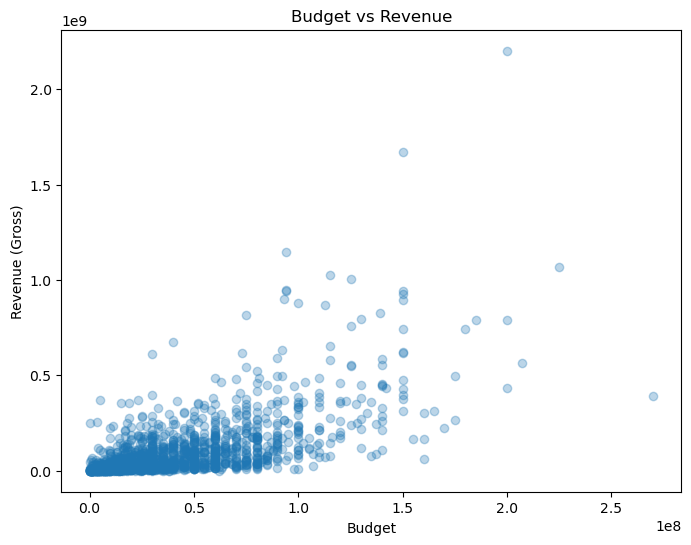

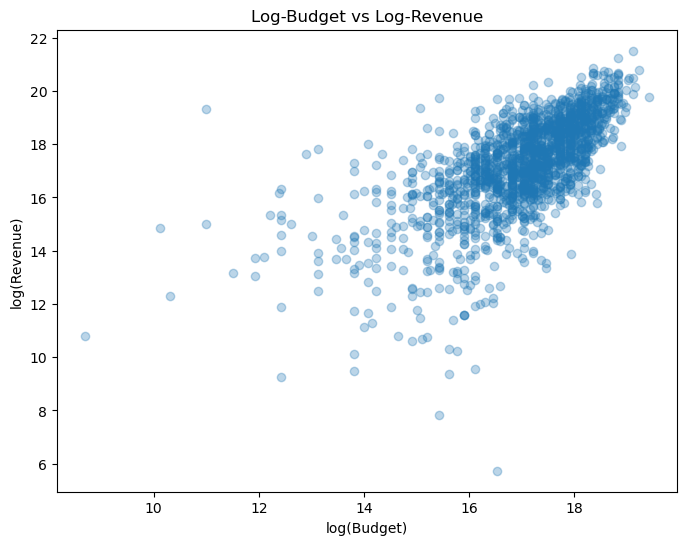

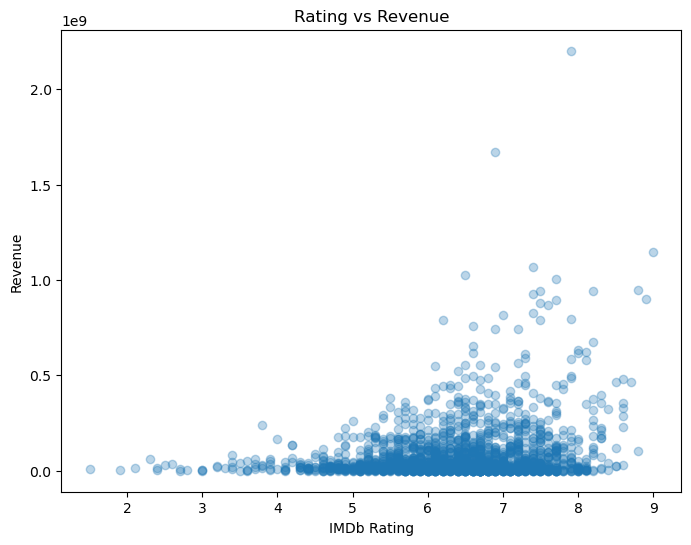

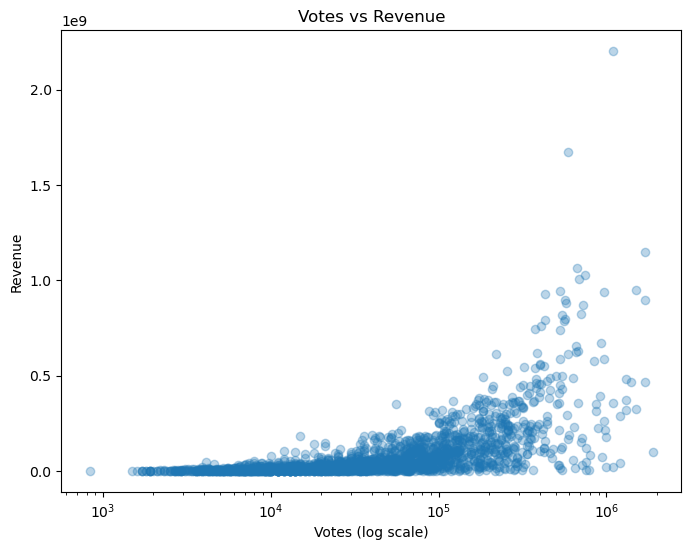

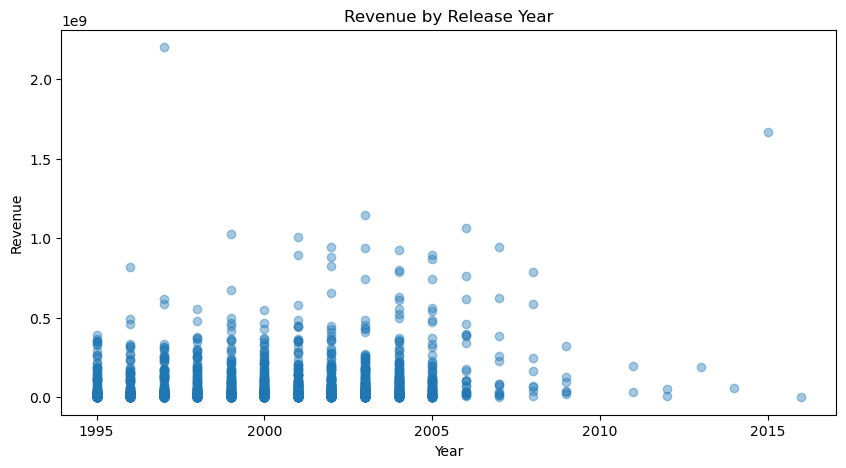

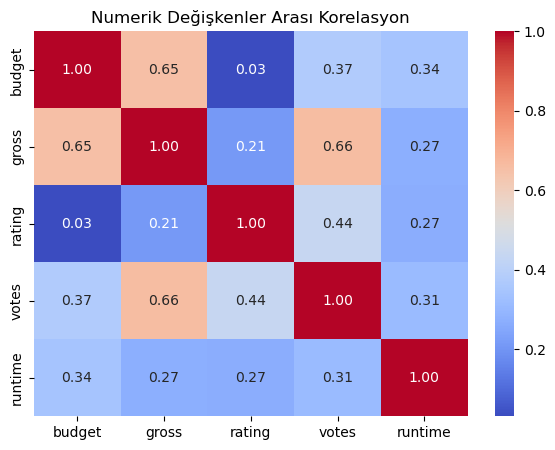

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("movies_with_revenue.csv")

df.head()
df.info()
df.isna().sum()
df.describe()


plt.figure(figsize=(8,5))
plt.hist(df["gross"].dropna(), bins=40)
plt.xlabel("Revenue (Gross)")
plt.ylabel("Film sayısı")
plt.title("Revenue dağılımı")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df["budget"].dropna(), bins=40)
plt.xlabel("Budget")
plt.ylabel("Film sayısı")
plt.title("Budget dağılımı")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df["budget"], df["gross"], alpha=0.3)
plt.xlabel("Budget")
plt.ylabel("Revenue (Gross)")
plt.title("Budget vs Revenue")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(np.log1p(df["budget"]), np.log1p(df["gross"]), alpha=0.3)
plt.xlabel("log(Budget)")
plt.ylabel("log(Revenue)")
plt.title("Log-Budget vs Log-Revenue")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df["rating"], df["gross"], alpha=0.3)
plt.xlabel("IMDb Rating")
plt.ylabel("Revenue")
plt.title("Rating vs Revenue")
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(df["votes"], df["gross"], alpha=0.3)
plt.xscale("log")
plt.xlabel("Votes (log scale)")
plt.ylabel("Revenue")
plt.title("Votes vs Revenue")
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(df["year"], df["gross"], alpha=0.4)
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Revenue by Release Year")
plt.show()


plt.figure(figsize=(7,5))
corr = df[["budget","gross","rating","votes","runtime"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerik Değişkenler Arası Korelasyon")
plt.show()

In [3]:
from scipy import stats

df_clean = df[(df["budget"] > 0) & (df["gross"] > 0)]
df_clean = df_clean.dropna(subset=["budget", "gross", "rating", "votes"])

#Hipotez 1

median_budget = df_clean["budget"].median()

high_budget = df_clean[df_clean["budget"] >= median_budget]["gross"]
low_budget  = df_clean[df_clean["budget"] < median_budget]["gross"]

t_stat, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)

print("High vs Low Budget Test")
print("t-istat:", t_stat)
print("p-değeri:", p_value)


#Hipotez 2

median_rating = df_clean["rating"].median()

high_rating = df_clean[df_clean["rating"] >= median_rating]["gross"]
low_rating  = df_clean[df_clean["rating"] < median_rating]["gross"]

t_stat2, p_value2 = stats.ttest_ind(high_rating, low_rating, equal_var=False)

print("High vs Low Rating Test")
print("t-istat:", t_stat2)
print("p-değeri:", p_value2)

High vs Low Budget Test
t-istat: 17.44991381962616
p-değeri: 2.414851522574654e-59
High vs Low Rating Test
t-istat: 8.253449034768883
p-değeri: 3.9335886968080016e-16
